In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 23.4 MB/s eta 0:00:00


In [2]:
!pip install roboflow
!pip install seaborn
!pip install ultralytics
from ultralytics import YOLO
from IPython.display import display
from PIL import Image
from IPython import display
display.clear_output()
import os
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 919, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'export', 'train', 'val', 'predict', 'benchmark', 'track'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'pose', 'detect', 'segment', 'classify', 'obb'})
                MODE (required) is one of frozenset({'export', 'train', 'val', 'predict', 'benchmark', 'track'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
     

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LS42Q96CFCnmVZ6cfMV7")
project = rf.workspace("data-preparation-model-training-integration-with-ai-pipelines").project("image-detection-jymfc-mwmtz")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Image-Detection-1 in yolov8:: 100%|██████████| 228/228 [00:00<00:00, 8845.96it/s]


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 303MB/s]
Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Image-Detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [6]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/11 /content/Image-Detection-1/test/images/black_5_jpeg.rf.052d5ab627d7190042a861c9027e9b4d.jpg: 640x640 (no detections), 37.0ms
image 2/11 /content/Image-Detection-1/test/images/cd70-black_02-1_png.rf.96ae41c2b3b754bbc1ae8c560df71116.jpg: 320x640 1 CD70 Black, 72.7ms
image 3/11 /content/Image-Detection-1/test/images/cd70-black_27-1_png.rf.897c404351820a736c3e2ef119193fff.jpg: 320x640 1 CD70 Black, 22.7ms
image 4/11 /content/Image-Detection-1/test/images/cd70-black_32-1_png.rf.ac549eeb16a29bca0df17cbff55acd99.jpg: 320x640 1 CD70 Black, 22.6ms
image 5/11 /content/Image-Detection-1/test/images/cd70-blue_0010_0_png.rf.0f2e4fea67b2ab6baf6f2151f361c643.jpg: 320x640 1 CD70 Black, 1 CD70 Blue, 22.6ms
image 6/11 /content/Image-Detection-1/test/images/cd70-blue_0023_0_png.rf.d83ea17b3f26feeea49abd2bb5768dfa.jpg: 320x640 (no 

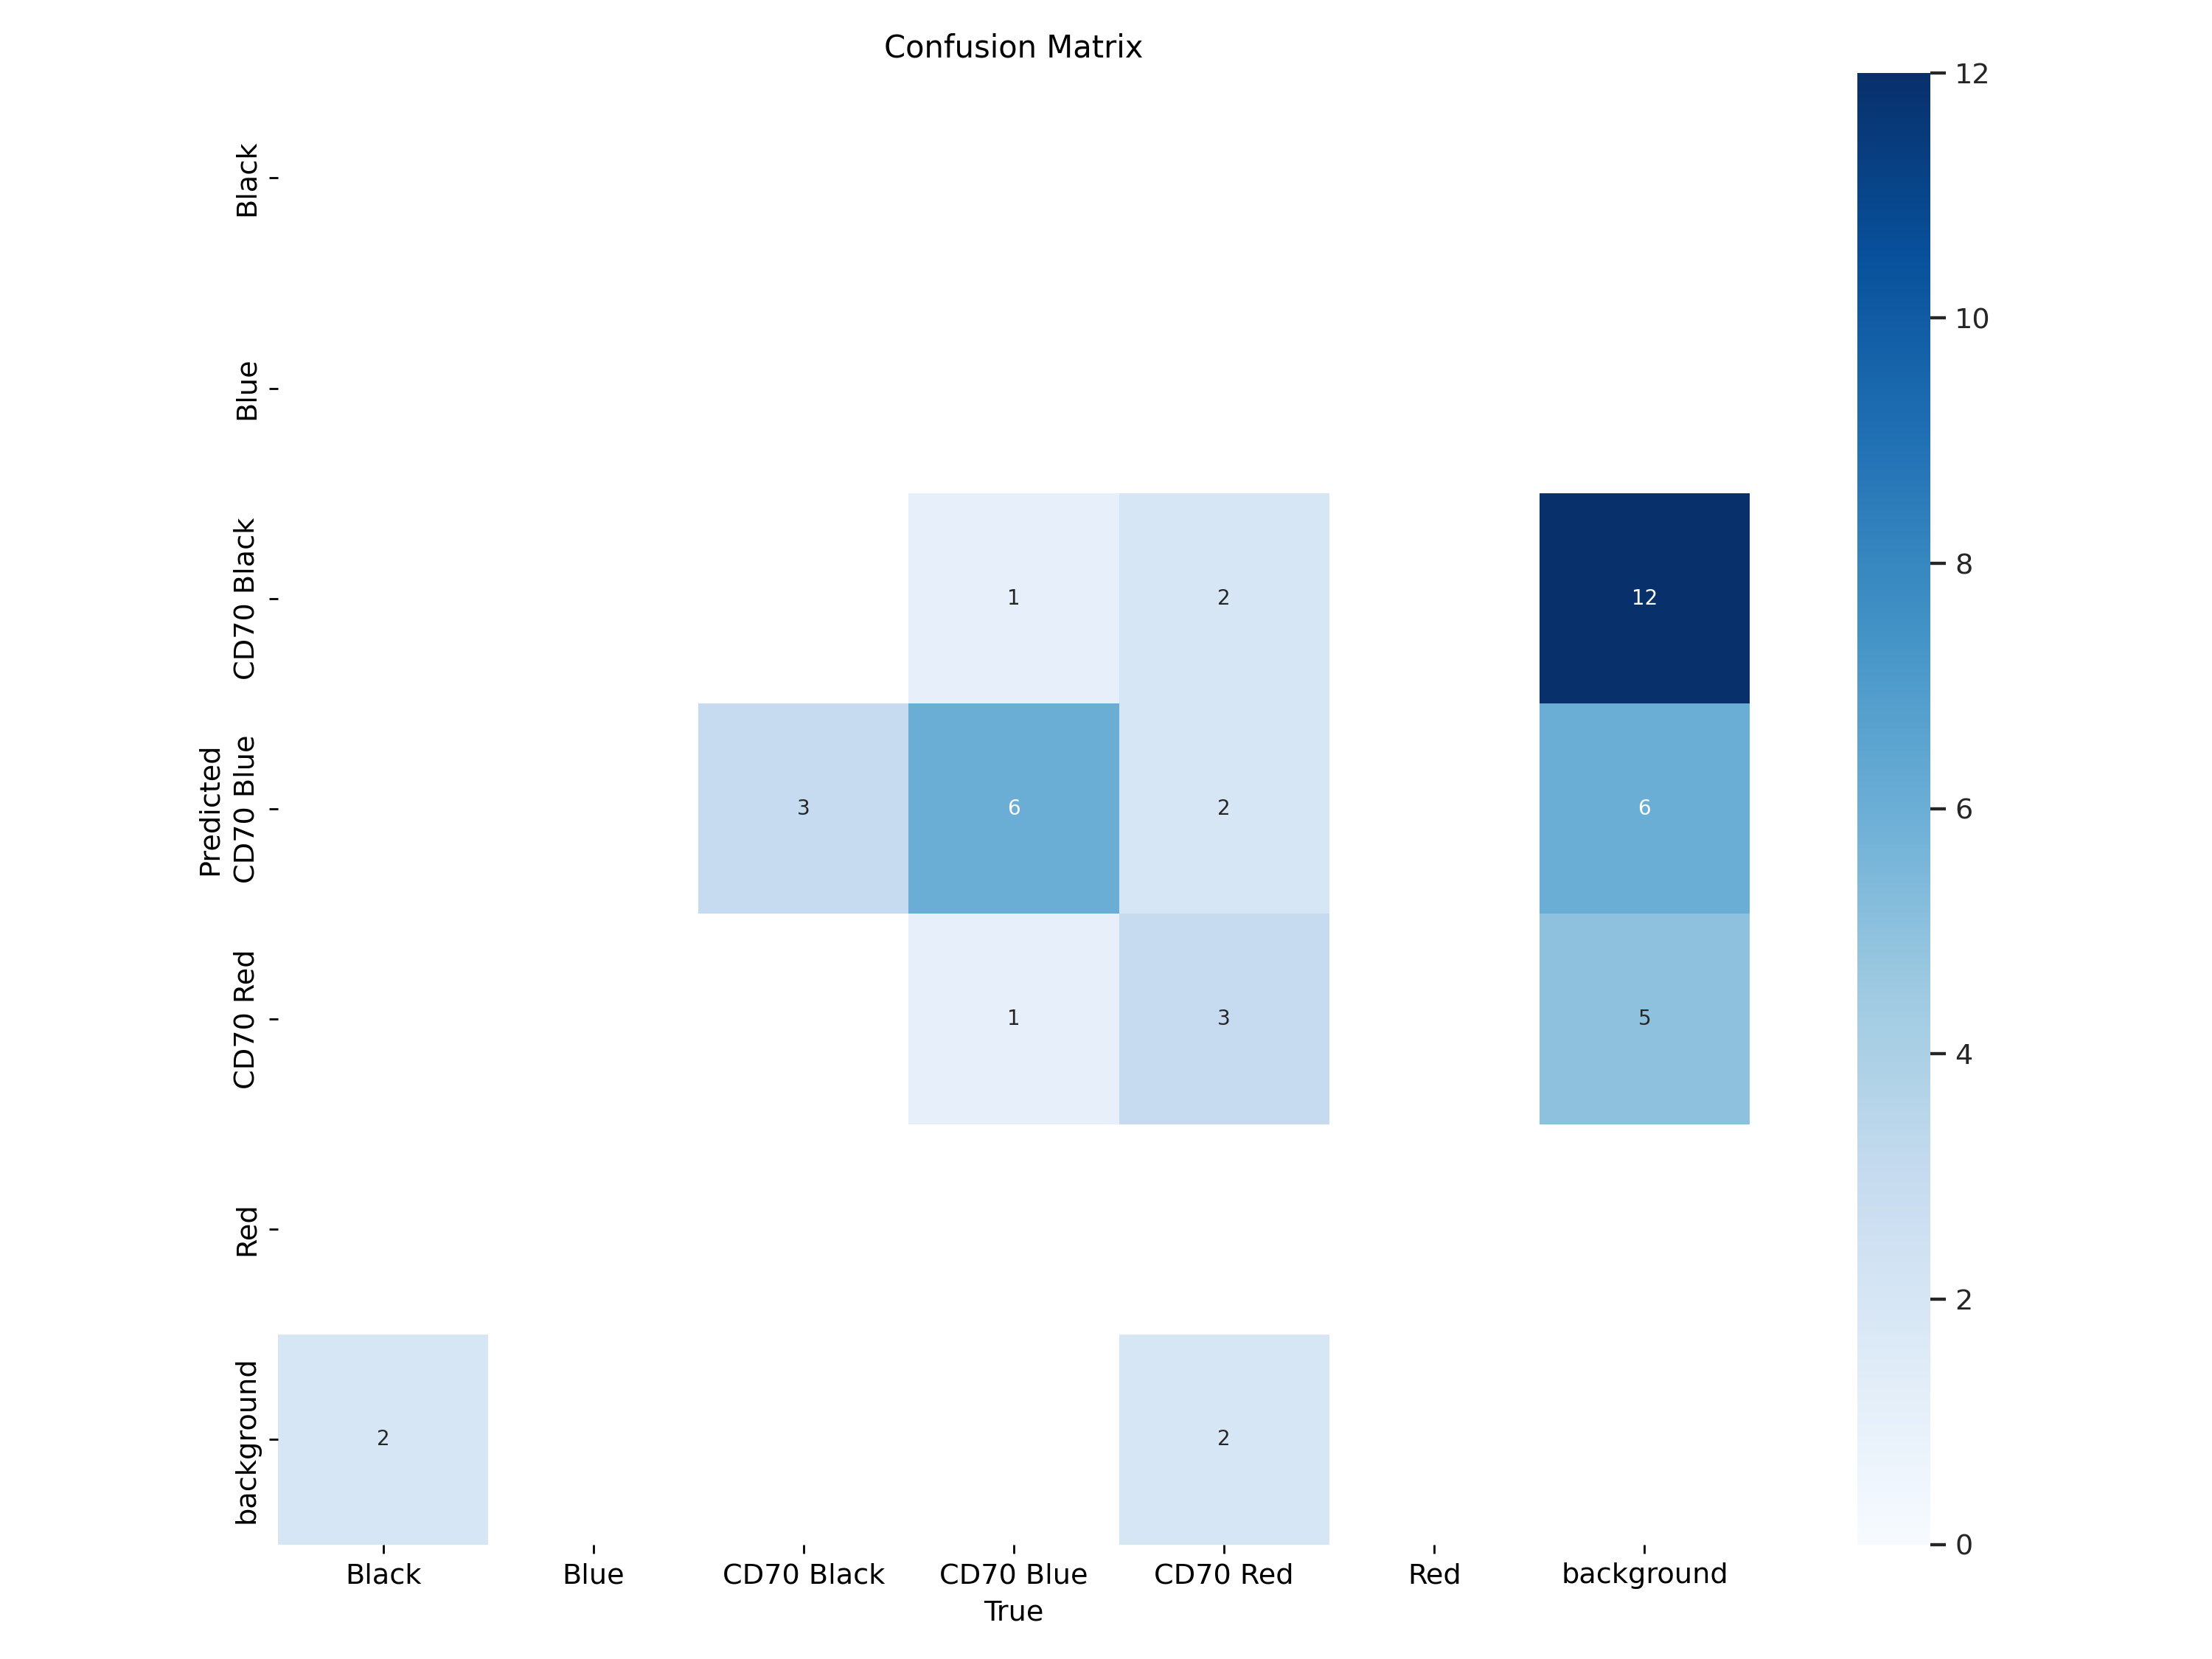

In [7]:
from IPython.display import display # Import the display function (may already be imported)
from PIL import Image

img = Image.open(f"/content/runs/detect/train/confusion_matrix.png")
img.show()  # To display the image using PIL's show()
# or
display(img)

In [8]:

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Image-Detection-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.29it/s]
                   all         21         22      0.691      0.632      0.526      0.446
                 Black          1          2          1          0    0.00535   0.000535
            CD70 Black          3          3      0.217          1      0.544      0.435
             CD70 Blue          8          8      0.549      0.875        0.8       0.72
              CD70 Red          9          9          1      0.653      0.753      0.627
Speed: 0.4ms preprocess, 21.6ms inference, 0.0ms loss, 42.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https

In [9]:
from ultralytics import YOLO

# Load YOLOv8s Pretrained Model
model = YOLO("yolov8s.pt")  # YOLOv8 Small model

# Train the model on the custom dataset
results = model.train(
    data=dataset.location + "/data.yaml",  # Corrected path to your data.yaml file
    epochs=10,                  # Number of epochs
    imgsz=640,                  # Image size
    batch=16,                   # Batch size
    name="custom-yolo-training"  # Experiment name
)

Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Image-Detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom-yolo-training2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

train: Scanning /content/Image-Detection-1/train/labels.cache... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Image-Detection-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]


Plotting labels to runs/detect/custom-yolo-training2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/custom-yolo-training2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         4G      3.109      31.03       2.73         13        640: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         21         22    0.00708     0.0278    0.00462   0.000462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       3.9G      3.182      35.02      2.835         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         21         22    0.00474     0.0556    0.00459   0.000647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.93G       2.88      21.49      2.547         12        640: 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         21         22    0.00474     0.0556    0.00459   0.000647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         4G      2.124      6.526      1.894         13        640: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         21         22     0.0227     0.0278     0.0136    0.00544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.88G       1.67      4.982      1.654         15        640: 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         21         22       0.57      0.139     0.0808     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         4G      1.421      4.399      1.477         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         21         22      0.208      0.435      0.237      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.03G      1.422      3.934      1.413         12        640: 100%|██████████| 5/5 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         21         22      0.213      0.486      0.317       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         4G       1.32      3.369      1.379         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         21         22       0.23      0.437      0.282      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.03G      1.128      3.143      1.248         12        640: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         21         22      0.248      0.632      0.305      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         4G      1.075      2.866      1.203         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         21         22      0.248      0.632       0.35      0.277



10 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/custom-yolo-training2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/custom-yolo-training2/weights/best.pt, 22.5MB

Validating runs/detect/custom-yolo-training2/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


                   all         21         22       0.25      0.632       0.35      0.277
                 Black          1          2          0          0          0          0
            CD70 Black          3          3     0.0673          1      0.242      0.206
             CD70 Blue          8          8      0.516       0.75      0.627      0.481
              CD70 Red          9          9      0.416      0.778      0.531       0.42
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/custom-yolo-training2


In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/11 /content/Image-Detection-1/test/images/black_5_jpeg.rf.052d5ab627d7190042a861c9027e9b4d.jpg: 640x640 (no detections), 37.0ms
image 2/11 /content/Image-Detection-1/test/images/cd70-black_02-1_png.rf.96ae41c2b3b754bbc1ae8c560df71116.jpg: 320x640 1 CD70 Black, 76.0ms
image 3/11 /content/Image-Detection-1/test/images/cd70-black_27-1_png.rf.897c404351820a736c3e2ef119193fff.jpg: 320x640 1 CD70 Black, 19.3ms
image 4/11 /content/Image-Detection-1/test/images/cd70-black_32-1_png.rf.ac549eeb16a29bca0df17cbff55acd99.jpg: 320x640 1 CD70 Black, 19.2ms
image 5/11 /content/Image-Detection-1/test/images/cd70-blue_0010_0_png.rf.0f2e4fea67b2ab6baf6f2151f361c643.jpg: 320x640 1 CD70 Black, 1 CD70 Blue, 19.2ms
image 6/11 /content/Image-Detection-1/test/images/cd70-blue_0023_0_png.rf.d83ea17b3f26feeea49abd2bb5768dfa.jpg: 320x640 (no 

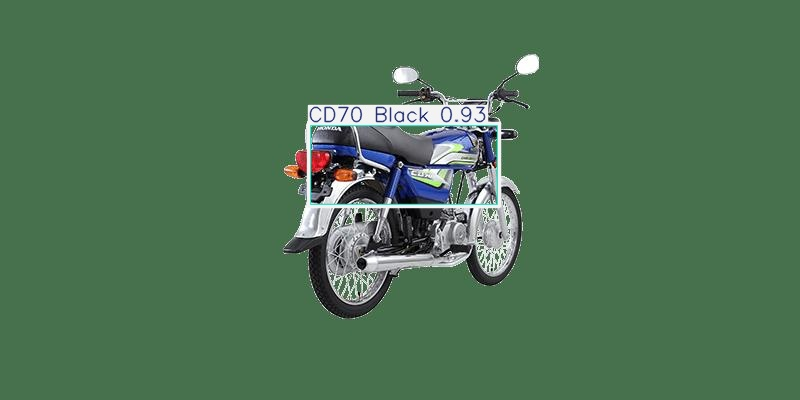

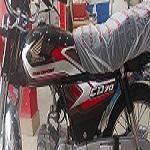

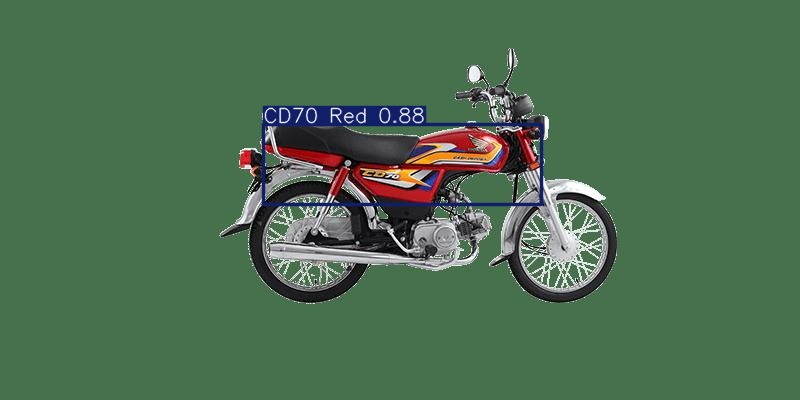

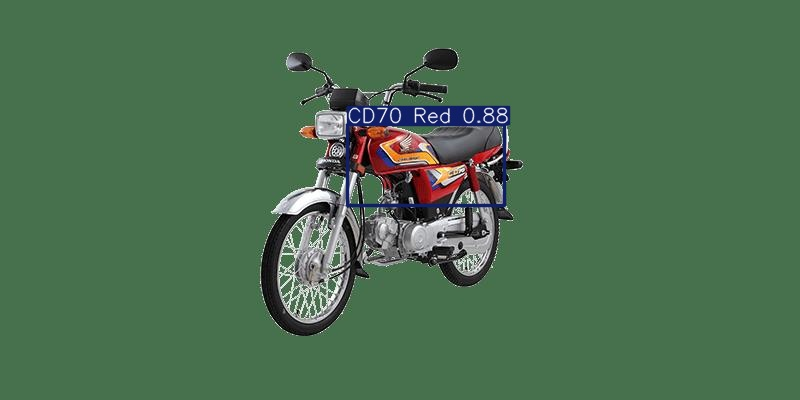

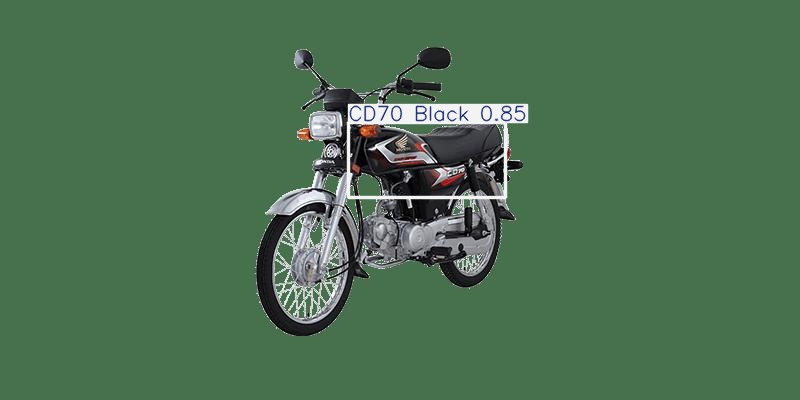

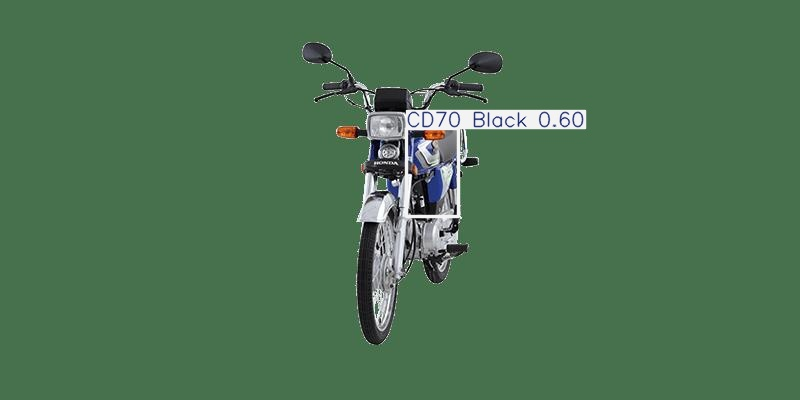

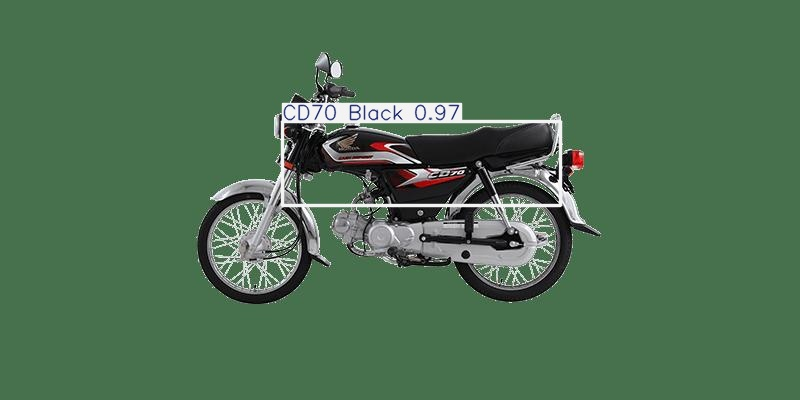

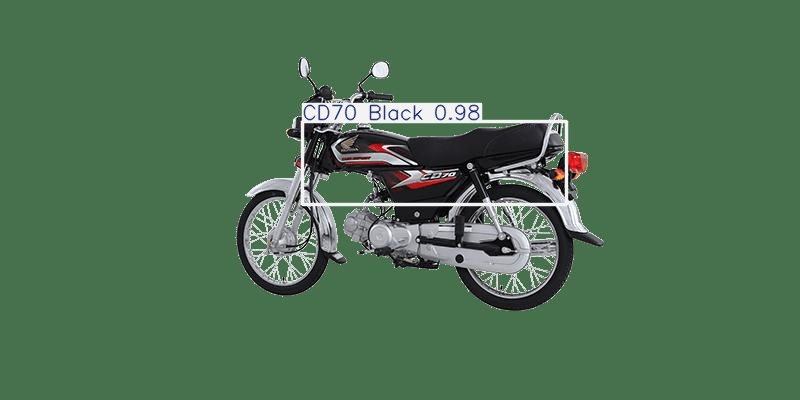

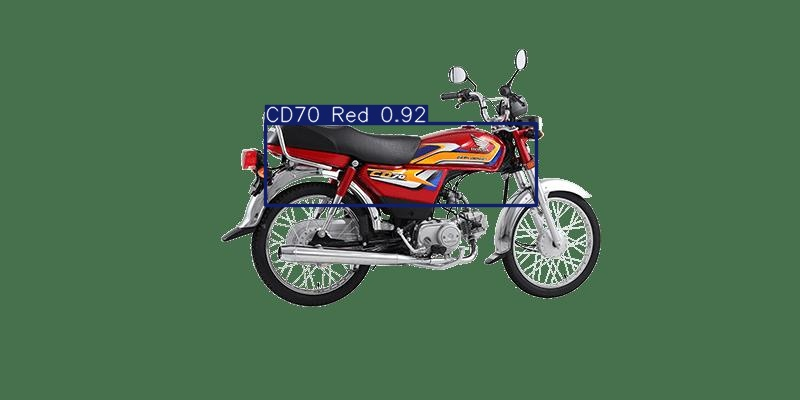

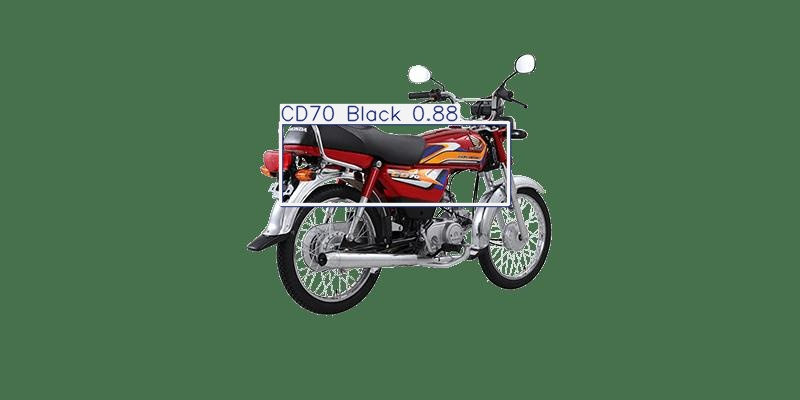

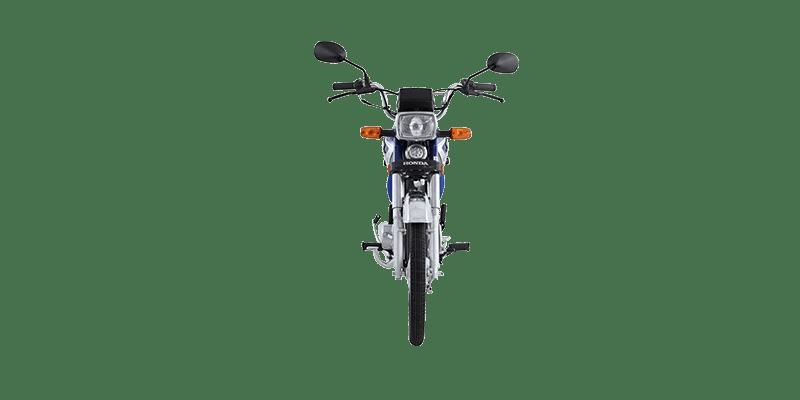

In [11]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
	display(Image(filename=image_path, height=600))
	print("\n")

In [32]:


import yaml

with open(f"{dataset.location}/data.yaml", 'r') as stream:
    try:
        data = yaml.safe_load(stream)
        print(f"Classes: {data['names']}")
    except yaml.YAMLError as exc:
        print(exc)

Classes: ['Black', 'Blue', 'CD70 Black', 'CD70 Blue', 'CD70 Red', 'Red']


In [12]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluate the model
metrics = model.val()
print(metrics)

Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Image-Detection-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


                   all         21         22      0.691      0.632      0.526      0.446
                 Black          1          2          1          0    0.00535   0.000535
            CD70 Black          3          3      0.217          1      0.544      0.435
             CD70 Blue          8          8      0.549      0.875        0.8       0.72
              CD70 Red          9          9          1      0.653      0.753      0.627
Speed: 0.2ms preprocess, 21.4ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2e6dcbfa60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,   

In [16]:
dataset.location


'/content/Image-Detection-1'

Processing image: /content/Image-Detection-1/test/images/cd70-blue_0010_0_png.rf.0f2e4fea67b2ab6baf6f2151f361c643.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-blue_0010_0_png.rf.0f2e4fea67b2ab6baf6f2151f361c643.jpg: 320x640 1 CD70 Black, 1 CD70 Blue, 24.5ms
Speed: 2.3ms preprocess, 24.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict55


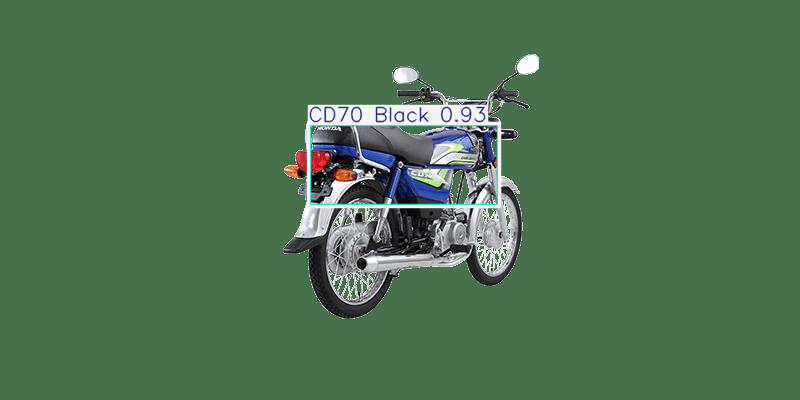

Processing image: /content/Image-Detection-1/test/images/black_5_jpeg.rf.052d5ab627d7190042a861c9027e9b4d.jpg

image 1/1 /content/Image-Detection-1/test/images/black_5_jpeg.rf.052d5ab627d7190042a861c9027e9b4d.jpg: 640x640 (no detections), 37.0ms
Speed: 3.0ms preprocess, 37.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict56


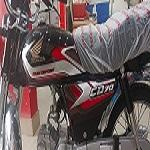

Processing image: /content/Image-Detection-1/test/images/cd70-red_0014_0_png.rf.5c9ef1d26ea575cc5b35638d4170a975.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-red_0014_0_png.rf.5c9ef1d26ea575cc5b35638d4170a975.jpg: 320x640 1 CD70 Black, 1 CD70 Red, 25.3ms
Speed: 3.9ms preprocess, 25.3ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict57


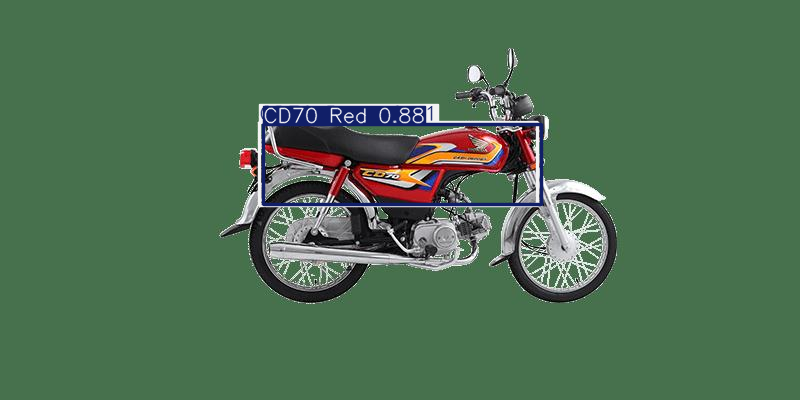

Processing image: /content/Image-Detection-1/test/images/cd70-red_0026_0_png.rf.3ad82a55906572ead904c4e94ec13034.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-red_0026_0_png.rf.3ad82a55906572ead904c4e94ec13034.jpg: 320x640 1 CD70 Red, 23.4ms
Speed: 1.5ms preprocess, 23.4ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict58


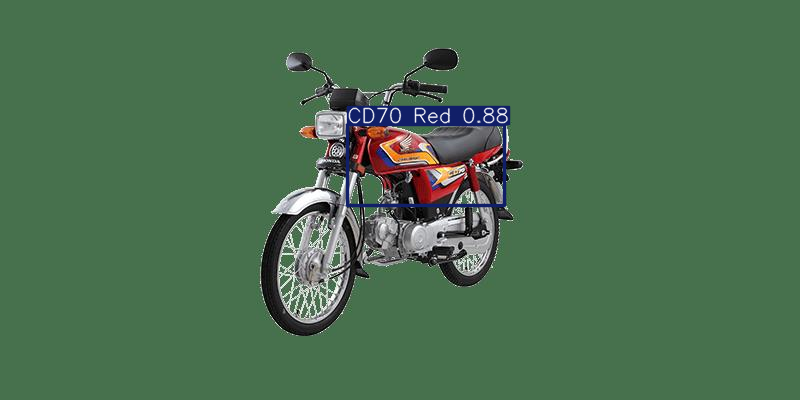

Processing image: /content/Image-Detection-1/test/images/cd70-black_27-1_png.rf.897c404351820a736c3e2ef119193fff.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-black_27-1_png.rf.897c404351820a736c3e2ef119193fff.jpg: 320x640 1 CD70 Black, 23.6ms
Speed: 1.6ms preprocess, 23.6ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict59


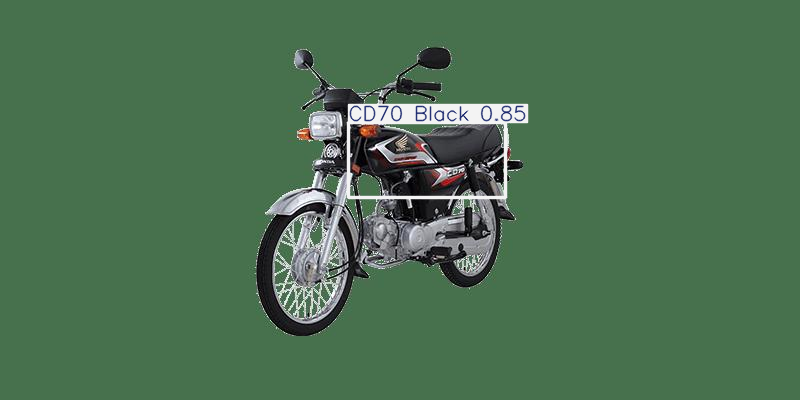

Processing image: /content/Image-Detection-1/test/images/cd70-blue_0024_0_png.rf.edbce357ef712016c6ddf243c546cc09.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-blue_0024_0_png.rf.edbce357ef712016c6ddf243c546cc09.jpg: 320x640 1 CD70 Black, 1 CD70 Blue, 23.6ms
Speed: 1.5ms preprocess, 23.6ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict60


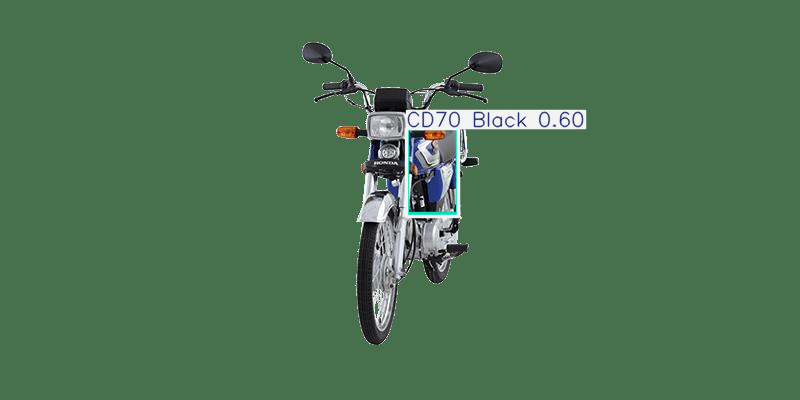

Processing image: /content/Image-Detection-1/test/images/cd70-black_32-1_png.rf.ac549eeb16a29bca0df17cbff55acd99.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-black_32-1_png.rf.ac549eeb16a29bca0df17cbff55acd99.jpg: 320x640 1 CD70 Black, 23.5ms
Speed: 1.5ms preprocess, 23.5ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict61


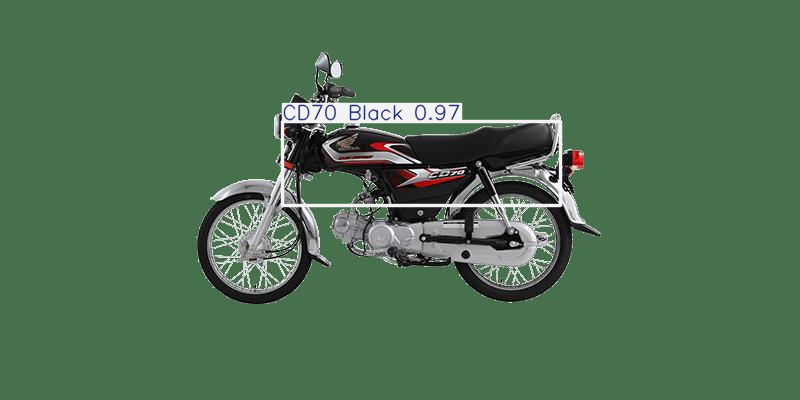

Processing image: /content/Image-Detection-1/test/images/cd70-black_02-1_png.rf.96ae41c2b3b754bbc1ae8c560df71116.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-black_02-1_png.rf.96ae41c2b3b754bbc1ae8c560df71116.jpg: 320x640 1 CD70 Black, 23.4ms
Speed: 2.4ms preprocess, 23.4ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict62


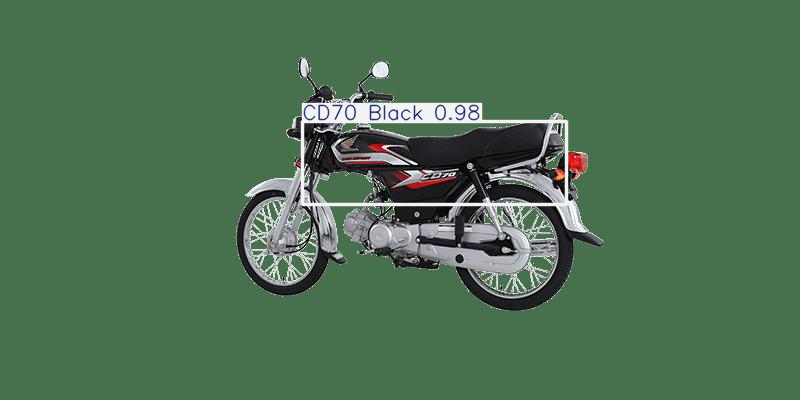

Processing image: /content/Image-Detection-1/test/images/cd70-red_0013_0_png.rf.14896168332348d8acfe2629fefbc9fc.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-red_0013_0_png.rf.14896168332348d8acfe2629fefbc9fc.jpg: 320x640 1 CD70 Red, 23.6ms
Speed: 1.5ms preprocess, 23.6ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict63


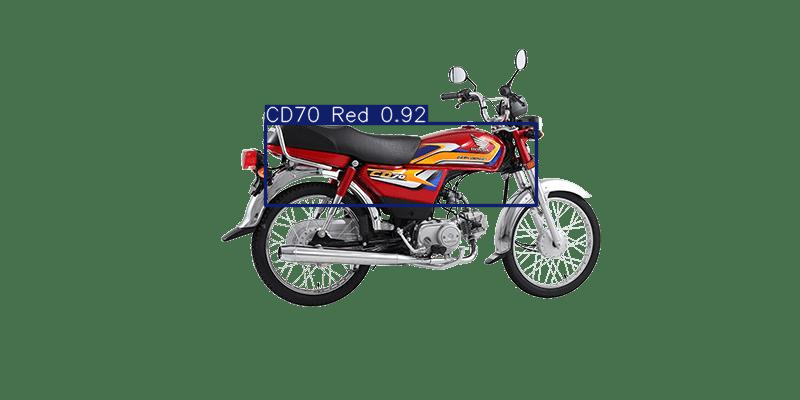

Processing image: /content/Image-Detection-1/test/images/cd70-red_0011_0_png.rf.41bc5daee02c2ae095bcbb5f21a35abd.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-red_0011_0_png.rf.41bc5daee02c2ae095bcbb5f21a35abd.jpg: 320x640 1 CD70 Black, 1 CD70 Red, 23.5ms
Speed: 2.3ms preprocess, 23.5ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict64


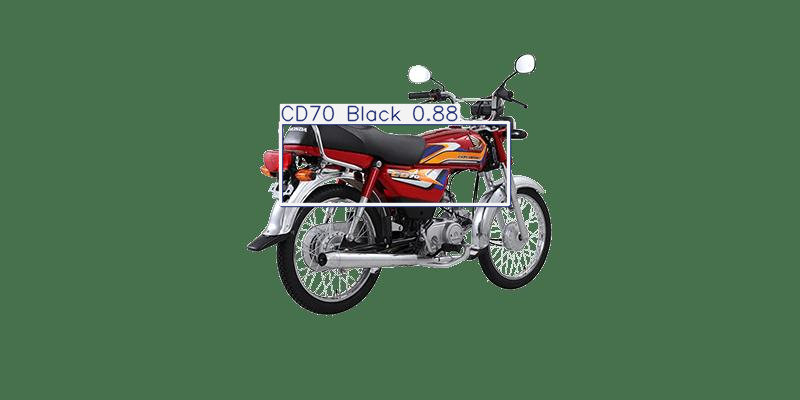

Processing image: /content/Image-Detection-1/test/images/cd70-blue_0023_0_png.rf.d83ea17b3f26feeea49abd2bb5768dfa.jpg

image 1/1 /content/Image-Detection-1/test/images/cd70-blue_0023_0_png.rf.d83ea17b3f26feeea49abd2bb5768dfa.jpg: 320x640 (no detections), 23.5ms
Speed: 1.5ms preprocess, 23.5ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict65


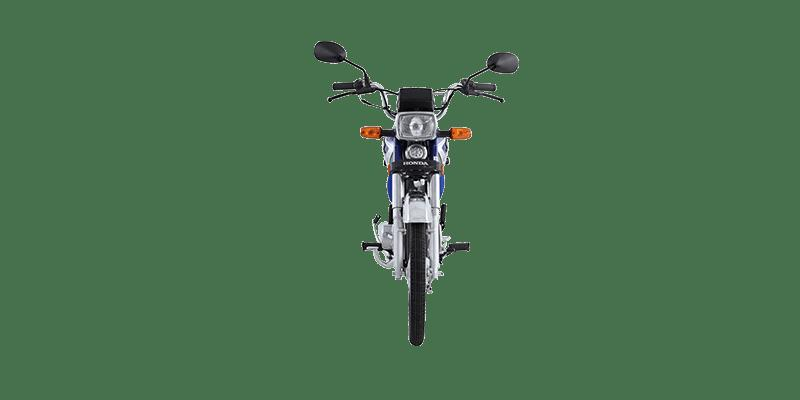

In [30]:
# prompt: perform the same function which you performed upper cell but on different images

import random
# Construct the correct path to the test images
test_images_path = os.path.join(dataset.location, 'test', 'images', '*.jpg')

# Get a list of all image files in the test directory
image_files = glob.glob(test_images_path)

# Check if any images were found
if not image_files:
    print("No images found in the test directory.")
else:
    # Loop through each image file
    for image_file in image_files:
        print(f"Processing image: {image_file}")

        # Run inference on the current image
        model = YOLO('/content/runs/detect/train/weights/best.pt')
        results = model.predict(source=image_file, save=True)

        # Display the results for the current image
        for r in results:
            im_array = r.plot()  # plot a BGR numpy array of predictions
            im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image # Using PIL.Image.fromarray
            display(im)

In [33]:


import yaml

with open(f"{dataset.location}/data.yaml", 'r') as stream:
    try:
        data = yaml.safe_load(stream)
        num_classes = len(data['names'])
        print(f"Number of classes: {num_classes}")
    except yaml.YAMLError as exc:
      print(exc)


Number of classes: 6


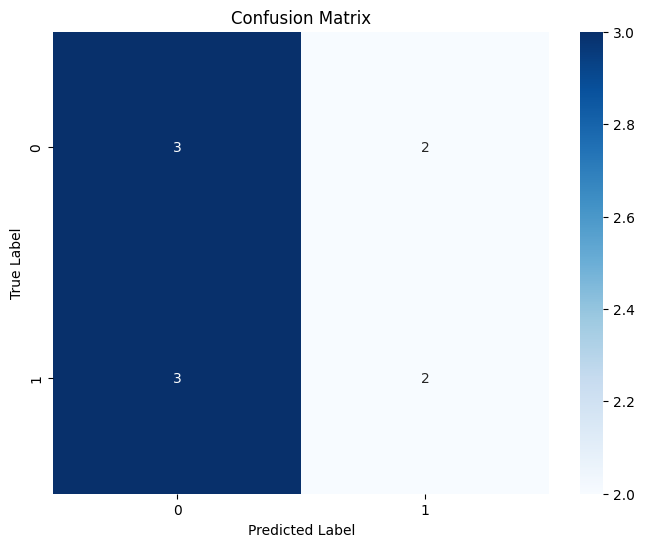

In [37]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_true' and 'y_pred' are your true and predicted labels
# Replace these with your actual data

# Example data (replace with your actual data)
y_true = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
y_pred = [0, 0, 1, 1, 1, 0, 0, 0, 1, 0]


def plot_confusion_matrix(y_true, y_pred, class_names=None):
    cm = confusion_matrix(y_true, y_pred)
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


# Example usage:
plot_confusion_matrix(y_true, y_pred)


